In [3]:
import h5py 
import numpy as np

# Get ACES data
h5ds = h5py.File("ACES/experiments/data/U133A_combat.h5")
X = np.array(h5ds['U133A_combat_RFS']['ExpressionData'])
y = np.array(h5ds['U133A_combat_RFS']['PatientClassLabels'])
aces_gene_names =  np.array(h5ds['U133A_combat_RFS']['GeneLabels'])
h5ds.close()

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
X.shape

(1616, 12750)

In [22]:
y==1

array([ True, False, False, ..., False, False,  True], dtype=bool)

(0, 1616)

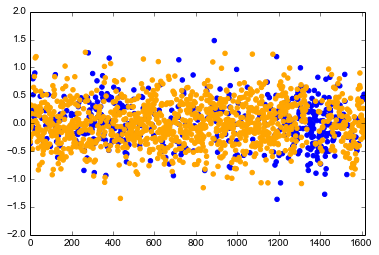

In [29]:
gene_idx = 45
plt.scatter(np.where(y==1)[0], X[np.where(y==1)[0], gene_idx], color='blue')
plt.scatter(np.where(y==0)[0], X[np.where(y==0)[0], gene_idx], color='orange')
plt.xlim(0, X.shape[0])

In [35]:
print "Proportion of zeros: %.3f" % (float(len(np.where(X<-1)[0]))/float(X.shape[0]*X.shape[1]))

Proportion of zeros: 0.017


In [46]:
# Number of constant genes (always expressed)
X_zeroed = np.where(X<-1, 1, 0)
print len(np.where(np.sum(X_zeroed, axis=0)==0)[0]), "genes are always expressed"

5970 genes are always expressed


I2D network: 12 643 nodes, of which 10 018 are present in the data, and 142309 edges.

In [47]:
print aces_gene_names[:10]

['Entrez_780' 'Entrez_5982' 'Entrez_7318' 'Entrez_2049' 'Entrez_4323'
 'Entrez_8717' 'Entrez_441263' 'Entrez_572' 'Entrez_10594' 'Entrez_826']


In [54]:
alist = list(aces_gene_names[:10])
gn1 = 'Entrez_5982'
gn2 = 'Entrez_76'
print alist.index(gn1)
print alist.index(gn2)

1


ValueError: 'Entrez_76' is not in list

In [76]:
aces_gene_names = list(aces_gene_names)
edges_set = set([]) # (gene_idx_1, gene_idx_2)
# gene_idx_1 < gene_idx_2
# idx in aces_gene_names, starting at 0
with open('ACES/experiments/data/I2D_edges_0411.sif') as f:
    for line in f:
        ls = line.split()
        gene_name_1 = 'Entrez_%s' % ls[0]
        gene_name_2 = 'Entrez_%s' % ls[2]
        # Exclude self edges
        if gene_name_1 == gene_name_2:
            continue 
        try:
            gene_idx_1 = aces_gene_names.index(gene_name_1)  
            gene_idx_2 = aces_gene_names.index(gene_name_2)
        except ValueError:
            continue
        if gene_idx_1 < gene_idx_2:
            e = (gene_idx_1, gene_idx_2)
        else:
            e = (gene_idx_2, gene_idx_1)
        edges_set.add(e)
    f.close()  

In [83]:
np.savetxt('I2D_edges.txt', np.array([list(x) for x in list(edges_set)]), fmt='%d')

In [77]:
len(edges_set)

118707

In [66]:
edges_list = np.array(edges_list)

In [85]:
genes_in_network = set(np.array([list(x) for x in list(edges_set)]).flatten())
print len(genes_in_network)

9900


In [86]:
len(set(np.where(np.sum(X_zeroed, axis=0)==0)[0]).intersection(genes_in_network))

4181

9900 genes in the network. 4181 of those are always expressed. 

In [87]:
X_binary = np.where(X<-1, 0, 1)


20246056

In [94]:
float(np.count_nonzero(X_binary))/(X.shape[1]*X.shape[1])

0.12454321261053442

In [92]:
np.count_nonzero(X_binary)

20246056